In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Reading and Understanding Data**

In [37]:
#Reading data
df = pd.read_csv("spam.csv", encoding='latin1')

In [38]:
#Displaying the first few 5 rows of dataset
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [39]:
#Checking shape of dataset
df.shape

(5572, 5)

In [40]:
#Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [41]:
#Finding missing values
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [42]:
#Filling missing values
df.fillna(value=0, inplace=True)

In [43]:
df.isnull().sum()

v1            0
v2            0
Unnamed: 2    0
Unnamed: 3    0
Unnamed: 4    0
dtype: int64

In [44]:
#Finding duplicate values
df.duplicated().sum()

403

In [45]:
#Removing duplicates
df = df.drop_duplicates(keep='first')

In [46]:
df.duplicated().sum()

0

In [47]:
#Drop unnecessary column in the dataframe
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5169 non-null   object
 1   v2      5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [49]:
#Renaming column names
df.rename(columns={'v1':'Label','v2':'Message'},inplace=True)
df.sample(5)

,Label,Message
2561,ham,And maybe some pressies
2998,ham,"Oh, then your phone phoned me but it disconnected"
139,ham,Got c... I lazy to type... I forgot Ì_ in lect...
2386,ham,No message..no responce..what happend?
4090,ham,Hey doc pls I want to get nice t shirt for my ...


**Exploratory Data Analysis**

In [50]:
#Examining how instances are distributed among different classes in the dataset.
#count of ham and spam
df['Label'].value_counts()

ham     4516
spam     653
Name: Label, dtype: int64

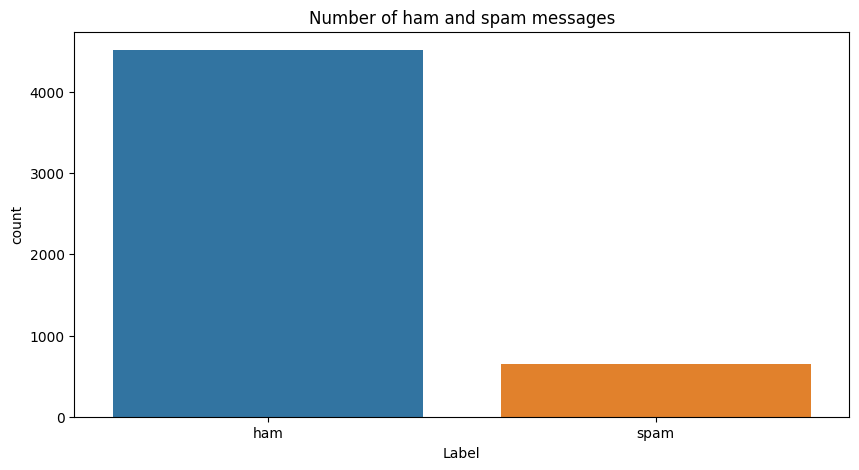

In [51]:
#Visualizing through seaborn countplot
plt.figure(figsize=(10,5))
sns.countplot(x='Label', data=df)
plt.title('Number of ham and spam messages')
plt.show()

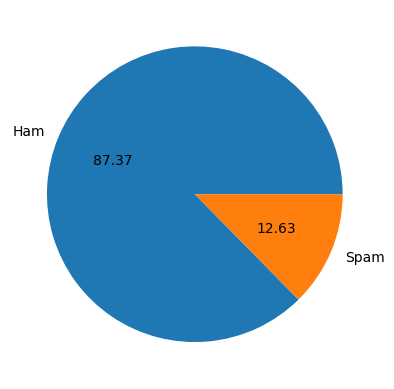

In [52]:
#Pie Plot
plt.pie(df['Label'].value_counts(), labels=['Ham','Spam'],autopct="%0.2f")
plt.show()

In [53]:
# Convert "Category" column values to numerical representation
df['Label'] = df['Label'].map({'spam': 1, 'ham': 0}).fillna(df['Label'])

# Verify the conversion
print(df['Label'].value_counts())

0    4516
1     653
Name: Label, dtype: int64


**Training and Testing**

In [54]:
#Feature (message)
X = df["Message"]
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5169, dtype: object


In [55]:
#target (Label) data
y = df["Label"]
print(y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Label, Length: 5169, dtype: int64


In [56]:
#Text Vectorization using Tfidf
#to convert a collection of raw text into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features.
from sklearn.feature_extraction.text import TfidfVectorizer

In [57]:
# Feature Extraction
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['Message']).toarray()

In [58]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [59]:
# provides the dimensions of the TF-IDF feature matrix
X.shape

(5169, 3000)

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

**Model Building**

In [62]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy of Naive Bayes:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix of Naive Bayes:", confusion_matrix(y_test, y_pred))

Accuracy of Naive Bayes: 0.8887814313346228
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       894
           1       0.56      0.85      0.67       140

    accuracy                           0.89      1034
   macro avg       0.77      0.87      0.80      1034
weighted avg       0.92      0.89      0.90      1034

Confusion Matrix of Naive Bayes: [[800  94]
 [ 21 119]]


In [64]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [65]:
print("Accuracy of Logistic Regression:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix of Logistic Regression:", confusion_matrix(y_test, y_pred))

Accuracy of Logistic Regression: 0.965183752417795
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       894
           1       0.98      0.76      0.85       140

    accuracy                           0.97      1034
   macro avg       0.97      0.88      0.92      1034
weighted avg       0.97      0.97      0.96      1034

Confusion Matrix of Logistic Regression: [[892   2]
 [ 34 106]]


In [66]:
#SVM
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [67]:
print("Accuracy of Support Vector Machine:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix of Support Vector Machine:", confusion_matrix(y_test, y_pred))

Accuracy of Support Vector Machine: 0.97678916827853
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       894
           1       0.99      0.84      0.91       140

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034

Confusion Matrix of Support Vector Machine: [[893   1]
 [ 23 117]]


In [68]:
input_sms = ["I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."]
input_data = tfidf.transform(input_sms)


# Convert sparse input to dense format
input_data = input_data.toarray()
prediction = svc.predict(input_data)
print(prediction)
if prediction[0] == 1:
    print("The sms is classified as spam.")
else:
    print("The sms is classified as ham.")

[0]
The sms is classified as ham.


In [69]:
input_sms = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C apply 08452810075over18s"]
input_data = tfidf.transform(input_sms)


# Convert sparse input to dense format
input_data = input_data.toarray()
prediction = svc.predict(input_data)
print(prediction)
if prediction[0] == 1:
    print("The sms is classified as spam.")
else:
    print("The sms is classified as ham.")

[1]
The sms is classified as spam.


In [70]:
input_sms = ["Hey, what's up? Are you free tonight?"]
input_data = tfidf.transform(input_sms)


# Convert sparse input to dense format
input_data = input_data.toarray()
prediction = lr.predict(input_data)
print(prediction)
if prediction[0] == 1:
    print("The sms is classified as spam.")
else:
    print("The sms is classified as ham.")

[0]
The sms is classified as ham.
